In [62]:
import pandas as pd
import scipy.stats
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LinearRegression
# explain what anime are in report
df = pd.read_csv("Votes_2021_11_27.csv")
df

,Votes,Score,English_Name,Favourites_count,Popularity_ranking
0,677447,10,Death Note,145023.0,1
1,668585,9,Death Note,145023.0,1
2,519533,8,Death Note,145023.0,1
3,247163,7,Death Note,145023.0,1
4,82598,6,Death Note,145023.0,1
...,...,...,...,...,...
995,16193,5,Bungou Stray Dogs,NaN,100
996,5260,4,Bungou Stray Dogs,NaN,100
997,1832,3,Bungou Stray Dogs,NaN,100
998,730,2,Bungou Stray Dogs,NaN,100


In [63]:
name_grouping = df.groupby("English_Name").agg("sum").reset_index()
name_grouping

,English_Name,Votes,Score,Favourites_count,Popularity_ranking
0,Akame ga Kill!,1086769,55,0.0,290
1,Angel Beats!,1132672,55,0.0,200
2,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,850589,55,0.0,550
3,Another,852535,55,0.0,500
4,Ansatsu Kyoushitsu,948094,55,0.0,340
...,...,...,...,...,...
95,Tokyo Ghoul √A,1022299,55,96260.0,450
96,Toradora!,1169578,55,0.0,180
97,Violet Evergarden,738103,55,0.0,560
98,Yahari Ore no Seishun Love Comedy wa Machigatt...,707739,55,0.0,810


In [64]:
most_voted = name_grouping[name_grouping["Votes"] == name_grouping["Votes"].max()]
most_voted

,English_Name,Votes,Score,Favourites_count,Popularity_ranking
81,Shingeki no Kyojin,2260568,55,0.0,20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Popularity_ranking', ylabel='Votes'>

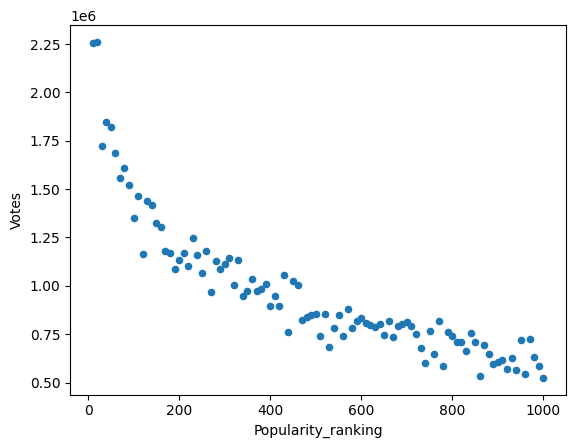

In [65]:
name_grouping.plot.scatter(x = "Popularity_ranking", y = "Votes")
# each anime is a point on the scatterplot (100 total anime)

In [66]:
np.corrcoef(name_grouping["Popularity_ranking"], name_grouping["Votes"])

array([[ 1.        , -0.87317505],
       [-0.87317505,  1.        ]])

<AxesSubplot: xlabel='Popularity_ranking', ylabel='Votes'>

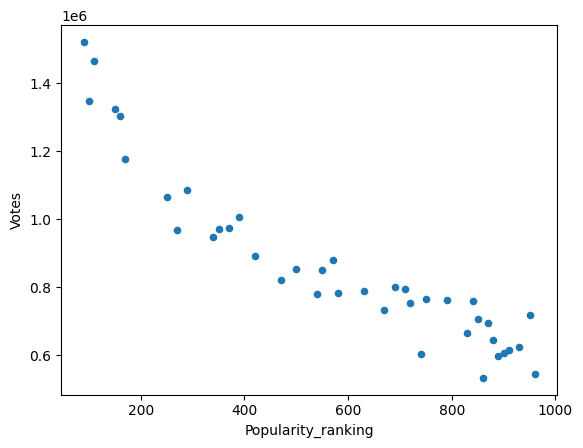

In [67]:
name_grouping.sample(n = 40).plot.scatter(x = "Popularity_ranking", y = "Votes")

In [68]:
mean_set = df.groupby("English_Name").agg("mean")
mean_set

,Votes,Score,Favourites_count,Popularity_ranking
English_Name,,,,
Akame ga Kill!,108676.9,5.5,NaN,29.0
Angel Beats!,113267.2,5.5,NaN,20.0
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,85058.9,5.5,NaN,55.0
Another,85253.5,5.5,NaN,50.0
Ansatsu Kyoushitsu,94809.4,5.5,NaN,34.0
...,...,...,...,...
Tokyo Ghoul √A,102229.9,5.5,9626.0,45.0
Toradora!,116957.8,5.5,NaN,18.0
Violet Evergarden,73810.3,5.5,NaN,56.0


In [69]:
favorite = mean_set[mean_set.Favourites_count == mean_set.Favourites_count.max()]
favorite

,Votes,Score,Favourites_count,Popularity_ranking
English_Name,,,,
Fullmetal Alchemist: Brotherhood,172008.6,5.5,190243.0,3.0


In [70]:
most_popular = mean_set[mean_set.Popularity_ranking == mean_set.Popularity_ranking.min()]
most_popular

,Votes,Score,Favourites_count,Popularity_ranking
English_Name,,,,
Death Note,225283.8,5.5,145023.0,1.0


In [71]:
next_anime_to_watch = mean_set[(mean_set.Popularity_ranking > 9) & (mean_set.Popularity_ranking != 11) & ((mean_set.Popularity_ranking < 14) | (mean_set.Popularity_ranking > 18)) & ((mean_set.Popularity_ranking < 22) | (mean_set.Popularity_ranking > 24)) & ((mean_set.Popularity_ranking < 26) | (mean_set.Popularity_ranking > 29)) & ((mean_set.Popularity_ranking < 32) | (mean_set.Popularity_ranking > 33)) & ((mean_set.Popularity_ranking < 35) | (mean_set.Popularity_ranking > 38)) 
                    & (mean_set.Popularity_ranking != 40) & (mean_set.Popularity_ranking != 42) & (mean_set.Popularity_ranking != 45) & (mean_set.Popularity_ranking != 46) & (mean_set.Popularity_ranking != 51) & (mean_set.Popularity_ranking != 52) & (mean_set.Popularity_ranking != 57) & (mean_set.Popularity_ranking != 59) & ((mean_set.Popularity_ranking < 62) | (mean_set.Popularity_ranking > 63)) & (mean_set.Popularity_ranking != 65) & (mean_set.Popularity_ranking != 67) & (mean_set.Popularity_ranking != 68) & (mean_set.Popularity_ranking != 71) & ((mean_set.Popularity_ranking < 78) | (mean_set.Popularity_ranking > 84)) 
                    & (mean_set.Popularity_ranking != 89) & (mean_set.Popularity_ranking != 93) & (mean_set.Popularity_ranking != 98)]
# possible anime that I haven't watched/ don't want to watch
next_anime_to_watch

,Votes,Score,Favourites_count,Popularity_ranking
English_Name,,,,
Angel Beats!,113267.2,5.5,NaN,20.0
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,85058.9,5.5,NaN,55.0
Another,85253.5,5.5,NaN,50.0
Ansatsu Kyoushitsu,94809.4,5.5,NaN,34.0
Ansatsu Kyoushitsu 2nd Season,70781.8,5.5,NaN,85.0
Bakemonogatari,64524.3,5.5,NaN,76.0
Boku dake ga Inai Machi,111208.6,5.5,NaN,30.0
Bungou Stray Dogs,52484.7,5.5,NaN,100.0
Charlotte,80648.6,5.5,NaN,61.0


In [72]:
next_anime_to_watch.sample(n = 1)

,Votes,Score,Favourites_count,Popularity_ranking
English_Name,,,,
Another,85253.5,5.5,NaN,50.0


In [73]:
#population votes data:
print(name_grouping["Votes"].mean())
print(name_grouping["Votes"].std())

964169.5
352583.9075226626


In [74]:
"""I think that the true mean of votes amongst the shows is higher than 96419.5 because the rankings show multiple seasons of the same anime with different rankings.
Because it is too difficult to separate anime by seasons and take votes data (there are variations of, for example, season 2, being depicted in different ways such as 'Season 2',
'2', 'II', etc.), I will conduct a 1 sample z test with a random sample of 33 anime from the name_grouping dataframe (representing roughly every show without any deviations due to seasons) because we 
know the population standard deviation.
Ho: mu = 964169.5
Ha: mu > 964169.5
"""
#sample mean:
ev = name_grouping["Votes"].sample(n=33).mean()
z = (ev - 96419.5)/(352583.9075226626/((33)**0.5))
z

14.176528364286005

In [75]:
p = 1 - norm.cdf(z)
p
""" p < 0.05
There is evidence that the true mean of anime (including their seasons)
votes from this dataset is greater than the mean of name_grouping's Votes column
because p < 0.05"""

" p < 0.05\nThere is evidence that the true mean of anime (including their seasons)\nvotes from this dataset is greater than the mean of name_grouping's Votes column\nbecause p < 0.05"

In [101]:
# Linear regression model, using name_grouping to predict votes of top 101th anime (extrapolation)
name_grouping["Popularity_ranking"] = name_grouping["Popularity_ranking"] /10
model = LinearRegression().fit(name_grouping[ ["Popularity_ranking"] ], name_grouping[["Votes"]])
model.predict([[101]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[428267.82242424]])

In [104]:
name_grouping["Predicted_votes"] = model.predict(name_grouping[["Popularity_ranking"]])
name_grouping["error"] = abs(name_grouping["Votes"] - name_grouping["Predicted_votes"])
name_grouping["error"].mean()

121072.79939585953